In [38]:
# Defining Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns
from scipy import stats

**Details of Variables:**

*Employee ID:* The unique ID allocated for each employee (example: fffe390032003000)

*Date of Joining:* The date-time when the employee has joined the organization (example: 2008-12-30)

*Gender:* The gender of the employee (Male/Female)

*Company Type:* The type of company where the employee is working (Service/Product)

*WFH Setup Available:* Is the work from home facility available for the employee (Yes/No)

*Designation:* The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.

*Resource Allocation:* The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)

*Mental Fatigue Score:* The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

*Burn Rate:* The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

In [39]:
train = pd.read_csv('train.csv')

In [40]:
#Check Designation value_counts
train['Designation'].value_counts()

2.0    7588
3.0    5985
1.0    4881
4.0    2391
0.0    1507
5.0     398
Name: Designation, dtype: int64

In [41]:
train.shape

(22750, 9)

In [42]:
train.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [44]:
# Checking duplicates in train columns
train.duplicated().sum()

0

In [45]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [46]:
# number of empty values
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [47]:
train = train.dropna()

In [48]:
train.shape

(18590, 9)

In [49]:
# number of empty values
train.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


### 2.1 One - Hot Encoding

It would be useful to convert these features,
1) Gender
2) Company Type
3) WFH Setup Available
to binary values by one-hot encoding

In [57]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Burn Rate Group
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,Low
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,Medium
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,Low
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,Medium
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29,Low


In [ ]:
#For Train Dataset

In [58]:
train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1})
train['Company Type'] = train['Company Type'].map({'Service': 0, 'Product': 1})
train['WFH Setup Available'] = train['WFH Setup Available'].map({'No': 0, 'Yes': 1})

In [59]:
# Create dummy variables for the 'Designation' column
designation_dummies = pd.get_dummies(train['Designation'], prefix='designation')

# Concatenate the dummy variables with the original DataFrame
train = pd.concat([train, designation_dummies], axis=1)

# Drop the original 'Gender' column
train.drop('Designation', axis=1, inplace=True)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  int64  
 3   Company Type          18590 non-null  int64  
 4   WFH Setup Available   18590 non-null  int64  
 5   Resource Allocation   18590 non-null  float64
 6   Mental Fatigue Score  18590 non-null  float64
 7   Burn Rate             18590 non-null  float64
 8   Burn Rate Group       18590 non-null  object 
 9   designation_0.0       18590 non-null  uint8  
 10  designation_1.0       18590 non-null  uint8  
 11  designation_2.0       18590 non-null  uint8  
 12  designation_3.0       18590 non-null  uint8  
 13  designation_4.0       18590 non-null  uint8  
 14  designation_5.0       18590 non-null  uint8  
dtypes: float64(3), int6

In [61]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Resource Allocation,Mental Fatigue Score,Burn Rate,Burn Rate Group,designation_0.0,designation_1.0,designation_2.0,designation_3.0,designation_4.0,designation_5.0
0,fffe32003000360033003200,2008-09-30,0,0,0,3.0,3.8,0.16,Low,0,0,1,0,0,0
1,fffe3700360033003500,2008-11-30,1,0,1,2.0,5.0,0.36,Medium,0,1,0,0,0,0
3,fffe32003400380032003900,2008-11-03,1,0,1,1.0,2.6,0.20,Low,0,1,0,0,0,0
4,fffe31003900340031003600,2008-07-24,0,0,0,7.0,6.9,0.52,Medium,0,0,0,1,0,0
5,fffe3300350037003500,2008-11-26,1,1,1,4.0,3.6,0.29,Low,0,0,1,0,0,0


### 2.2 The Column: "Date of Joining"

In [62]:
train["Date of Joining"].describe()

count          18590
unique           366
top       2008-01-06
freq              73
Name: Date of Joining, dtype: object

In [63]:
train["Date of Joining"].min()

'2008-01-01'

In [64]:
train["Date of Joining"].max()

'2008-12-31'

In [65]:
train["Date of Joining"]

0        2008-09-30
1        2008-11-30
3        2008-11-03
4        2008-07-24
5        2008-11-26
            ...    
22743    2008-12-15
22744    2008-05-27
22746    2008-01-19
22748    2008-01-10
22749    2008-01-06
Name: Date of Joining, Length: 18590, dtype: object

All the employees in the dataset seem to join in 2008. Thus, omiting the year and converting the dates to integers (just to days) might help us a bit along the way. Find the |newGuysDays−oldGuysDays| and normalise the data

In [66]:
train["Date of Joining"] = pd.to_datetime(train["Date of Joining"])

In [67]:
def create_days_count(date_of_joining, max_date):
    return (max_date - date_of_joining).days
# Calculate the maximum date of joining for 'train' and 'test' DataFrames
train_max_date = train['Date of Joining'].max()

# Calculate days_count for 'train' DataFrame
train["days_count"] = train.apply(lambda row: create_days_count(row['Date of Joining'], train_max_date), axis=1)

In [68]:
train["days_count"]

0         92
1         31
3         58
4        160
5         35
        ... 
22743     16
22744    218
22746    347
22748    356
22749    360
Name: days_count, Length: 18590, dtype: int64

### 2.3 : Correlation HeatMap

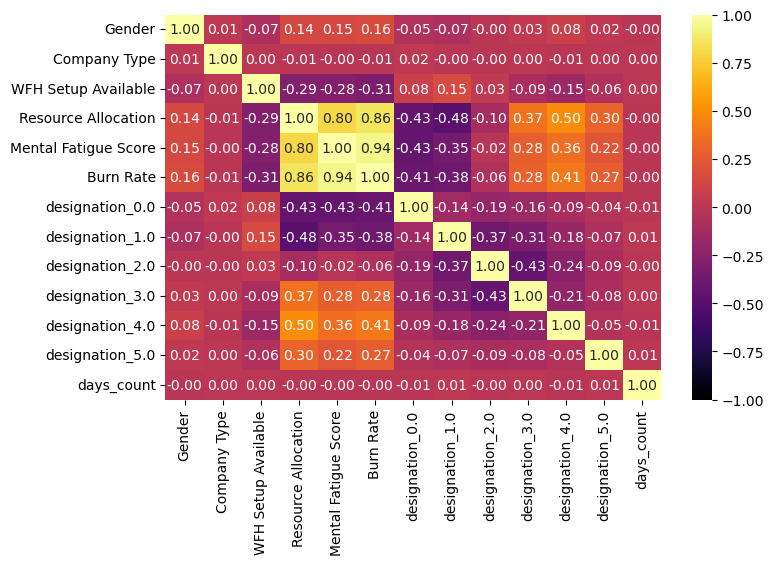

In [26]:
# Creating heatmap for correlated variables in train dataset:

train_corr = train.corr()

plt.figure(figsize=(8,5))
sns.heatmap(data=train_corr, 
            annot=True, 
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            cmap="inferno")
plt.yticks(rotation=0)
plt.show()

In [27]:
describe_original = train.describe()
describe_original

,Gender,Company Type,WFH Setup Available,Resource Allocation,Mental Fatigue Score,Burn Rate,designation_0.0,designation_1.0,designation_2.0,designation_3.0,designation_4.0,designation_5.0,days_count
count,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,0.475686,0.345132,0.539537,4.486552,5.732173,0.452444,0.066595,0.212695,0.334266,0.264658,0.104734,0.017052,182.511081
std,0.499422,0.475424,0.498448,2.044848,1.920547,0.197848,0.249326,0.409225,0.471746,0.441163,0.306218,0.129469,105.285866
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,4.600000,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000
50%,0.000000,0.000000,1.000000,4.000000,5.900000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000
75%,1.000000,1.000000,1.000000,6.000000,7.100000,0.590000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,274.000000
max,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000


# Exploratory Data Analysis (EDA)

### Burn Rate Profiling

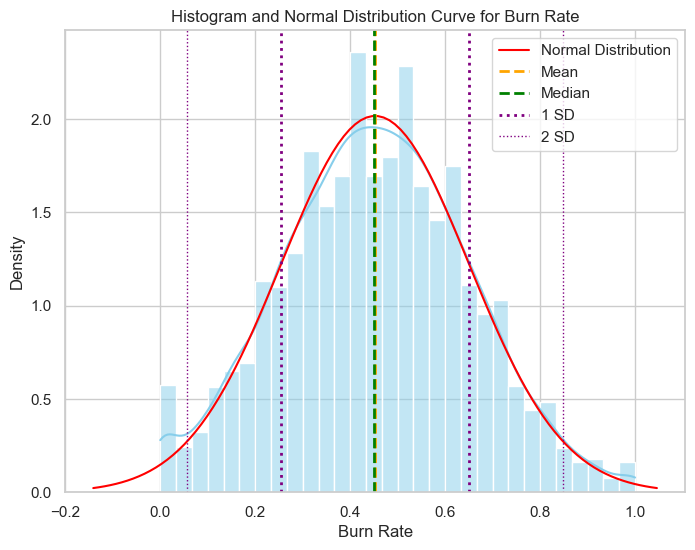

In [51]:
from scipy.stats import norm, shapiro

# Assuming 'burn rate' is a numerical column in the DataFrame 'train'
burn_rate_data = train['Burn Rate']

# Calculate the mean and median of 'burn rate'
mean = np.mean(burn_rate_data)
median = np.median(burn_rate_data)
std = np.std(burn_rate_data)

# Create a histogram of 'burn rate' data
plt.figure(figsize=(8, 6))
sns.histplot(burn_rate_data, kde=True, color='skyblue', bins=30, stat='density')

# Plot the normal distribution curve with the calculated mean and standard deviation
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color='red', label='Normal Distribution')

# Annotate with mean, median, and standard deviation
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean + std, color='purple', linestyle='dotted', linewidth=2, label='1 SD')
plt.axvline(mean - std, color='purple', linestyle='dotted', linewidth=2)
plt.axvline(mean + 2 * std, color='purple', linestyle='dotted', linewidth=1, label='2 SD')
plt.axvline(mean - 2 * std, color='purple', linestyle='dotted', linewidth=1)

plt.xlabel('Burn Rate')
plt.ylabel('Density')
plt.title('Histogram and Normal Distribution Curve for Burn Rate')
plt.legend()
plt.show()

### Type 1:

### Count for WFH Setup Available

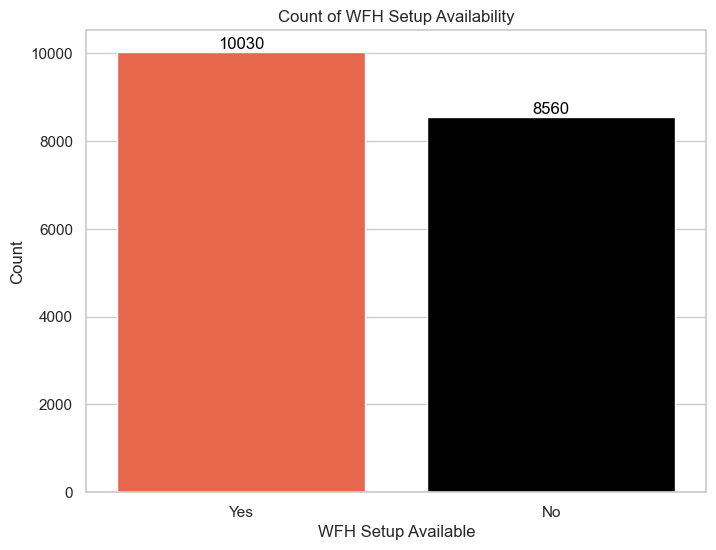

In [52]:
# Set custom colors for the countplot
custom_colors = ['#FF5733', '#000000']  # Orange and Black

# Set the order of the categories to appear on the countplot
category_order = ['Yes', 'No']

# Create the countplot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='WFH Setup Available', data=train, palette=custom_colors, order=category_order)

# Annotate the countplot with the count of each category
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')
# Set labels and title
plt.xlabel('WFH Setup Available')
plt.ylabel('Count')
plt.title('Count of WFH Setup Availability')

plt.show()

### Type 2:

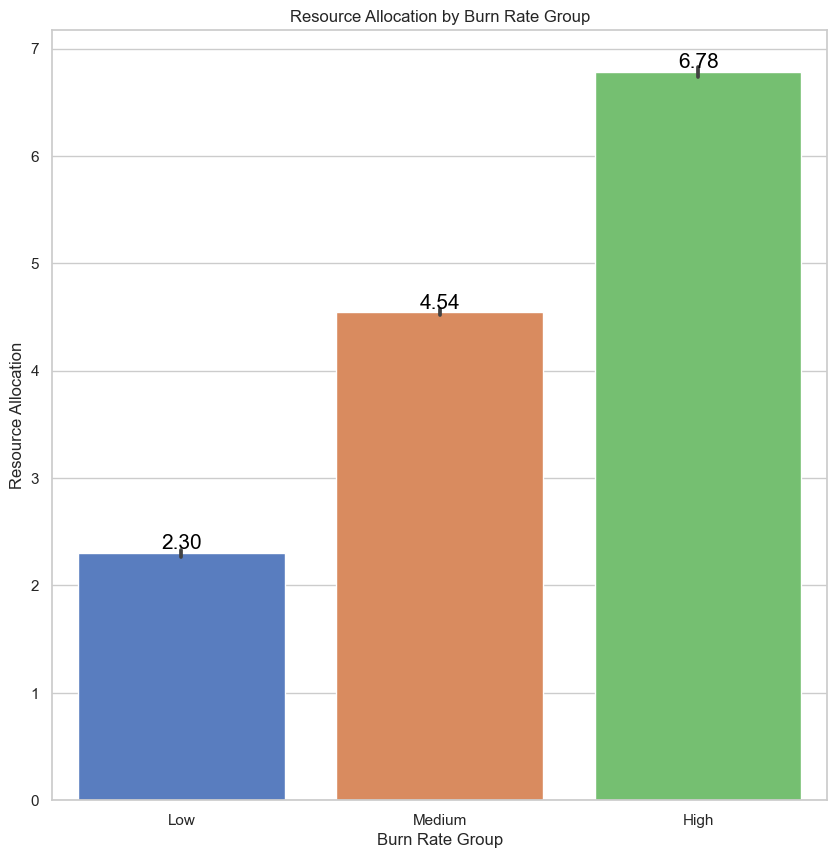

In [53]:
# Calculate percentiles (25th and 75th) of the 'burn rate' column
burn_rate_25th = train['Burn Rate'].quantile(0.25)
burn_rate_75th = train['Burn Rate'].quantile(0.75)

# Function to assign groups (low, medium, high) based on 'burn rate' values
def categorize_burn_rate(rate):
    if rate <= burn_rate_25th:
        return 'Low'
    elif rate <= burn_rate_75th:
        return 'Medium'
    else:
        return 'High'

# Create a new column 'Burn Rate Group' with the groups (low, medium, high)
train['Burn Rate Group'] = train['Burn Rate'].apply(categorize_burn_rate)

# Plot graph of 'resource allocation' against the groups
ax = sns.barplot(x='Burn Rate Group', y='Resource Allocation', data=train, palette='muted')

# Annotate the bars with 'Resource Allocation' values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')


plt.xlabel('Burn Rate Group')
plt.ylabel('Resource Allocation')
plt.title('Resource Allocation by Burn Rate Group')
plt.show()

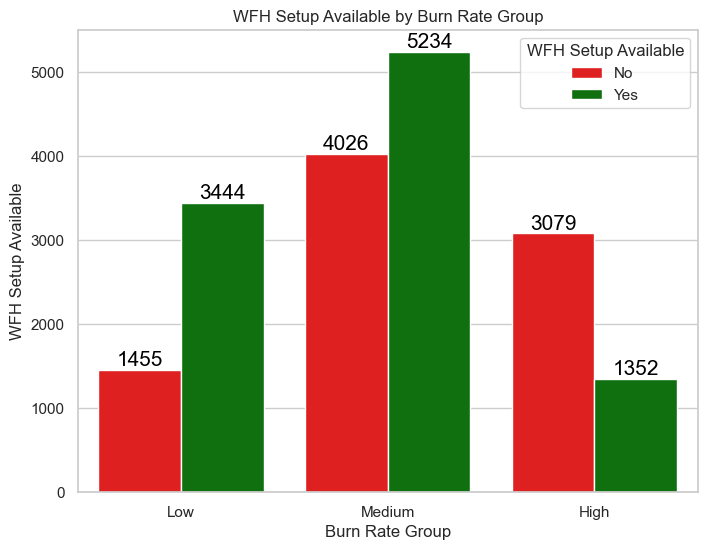

In [54]:
# Plot graph of 'resource allocation' against the groups
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Burn Rate Group', hue='WFH Setup Available', data=train, palette={'Yes': 'green', 'No': 'red'}, dodge=True)

# Annotate the bars with 'Resource Allocation' values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')


plt.xlabel('Burn Rate Group')
plt.ylabel('WFH Setup Available')
plt.title('WFH Setup Available by Burn Rate Group')
plt.show()

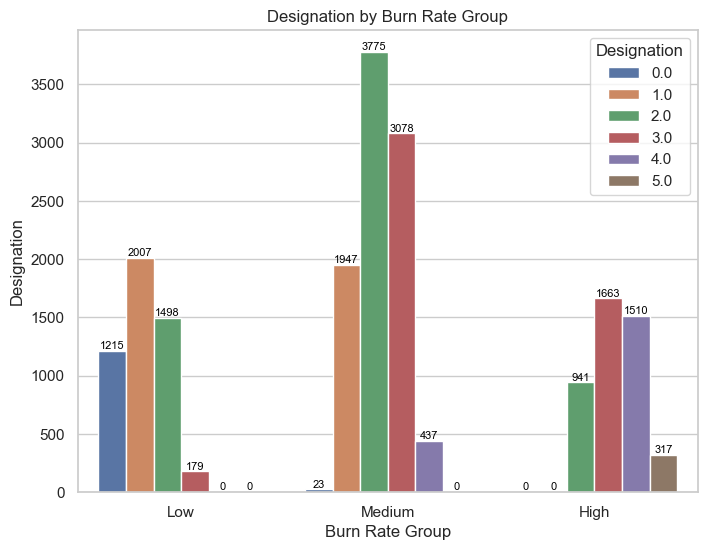

In [55]:
# Plot graph of 'resource allocation' against the groups
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Burn Rate Group', hue='Designation', data=train, dodge=True)

# Annotate the bars with 'Resource Allocation' values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black')


plt.xlabel('Burn Rate Group')
plt.ylabel('Designation')
plt.title('Designation by Burn Rate Group')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop 'Employee ID' and 'Date of Joining' columns
X = train.drop(['Burn Rate', 'Employee ID', 'Date of Joining','Burn Rate Group'], axis=1)  # Features (all columns except the 'target' column)
y = train['Burn Rate']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Resource Allocation',
       'Mental Fatigue Score', 'designation_0.0', 'designation_1.0',
       'designation_2.0', 'designation_3.0', 'designation_4.0',
       'designation_5.0', 'days_count'],
      dtype='object')

### Linear Regression

1. Linear Regression
2. Linear Regression considering significant values for p-values
3. PCR
4. Lasso
5. Ridge

In [79]:
#Basic linear regression
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the initial linear regression model using statsmodels with the constant term
X_with_constant = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_with_constant)
results = model.fit()

# Get the summary of the regression results
print(results.summary())

# Fit the linear regression model with the scaled feature set
reg_model = LinearRegression()
reg_result = reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test_scaled)

# Calculate RMSE, MSE, and R-squared for the updated model
rmse_linear_reg_without_p_value = mean_squared_error(y_test, y_pred, squared=False)
mse_linear_reg_without_p_value = mean_squared_error(y_test, y_pred)
r2_linear_reg_without_p_value = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("RMSE:", rmse_linear_reg_without_p_value)
print("MSE:", mse_linear_reg_without_p_value)
print("R-squared:", r2_linear_reg_without_p_value)

                            OLS Regression Results                            
Dep. Variable:              Burn Rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.006e+04
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:23:28   Log-Likelihood:                 27496.
No. Observations:               18590   AIC:                        -5.497e+04
Df Residuals:                   18578   BIC:                        -5.487e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0743 

In [80]:
#Linear regression with p values

# Step 1: Get p-values for the coefficients
p_values = results.pvalues

# Print the p-values for each coefficient
print("P-values for the coefficients:")
print(p_values)

# Step 2: Identify columns with p-values greater than 0.05 and drop them from the feature set
significant_columns = p_values[p_values <= 0.05].index
X_reduced = X_with_constant[significant_columns]

# Step 3: Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Step 4: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

# Step 5: Fit the linear regression model with the scaled feature set
reg_model_1 = LinearRegression()
reg_result_1 = reg_model.fit(X_train_scaled_1, y_train_1)

# Step 6: Make predictions on the test set
y_pred_1 = reg_model.predict(X_test_scaled_1)

# Step 7: Calculate RMSE, MSE, and R-squared for the updated model
rmse_linear_reg_p_value = mean_squared_error(y_test_1, y_pred_1, squared=False)
mse_linear_reg_p_value = mean_squared_error(y_test_1, y_pred_1)
r2_linear_reg_p_value = r2_score(y_test_1, y_pred_1)

# Print the evaluation metrics
print("RMSE:", rmse_linear_reg_p_value)
print("MSE:", mse_linear_reg_p_value)
print("R-squared:", r2_linear_reg_p_value)

P-values for the coefficients:
const                   1.009916e-239
Gender                   5.832841e-08
Company Type             5.119400e-01
WFH Setup Available      2.607834e-40
Resource Allocation      0.000000e+00
Mental Fatigue Score     0.000000e+00
designation_0.0          3.727488e-01
designation_1.0          7.041113e-32
designation_2.0         4.526807e-163
designation_3.0         8.565724e-169
designation_4.0          8.123353e-31
designation_5.0          2.076323e-04
days_count               8.478757e-01
dtype: float64
RMSE: 0.05479005071718076
MSE: 0.0030019496575912396
R-squared: 0.9224107696561159


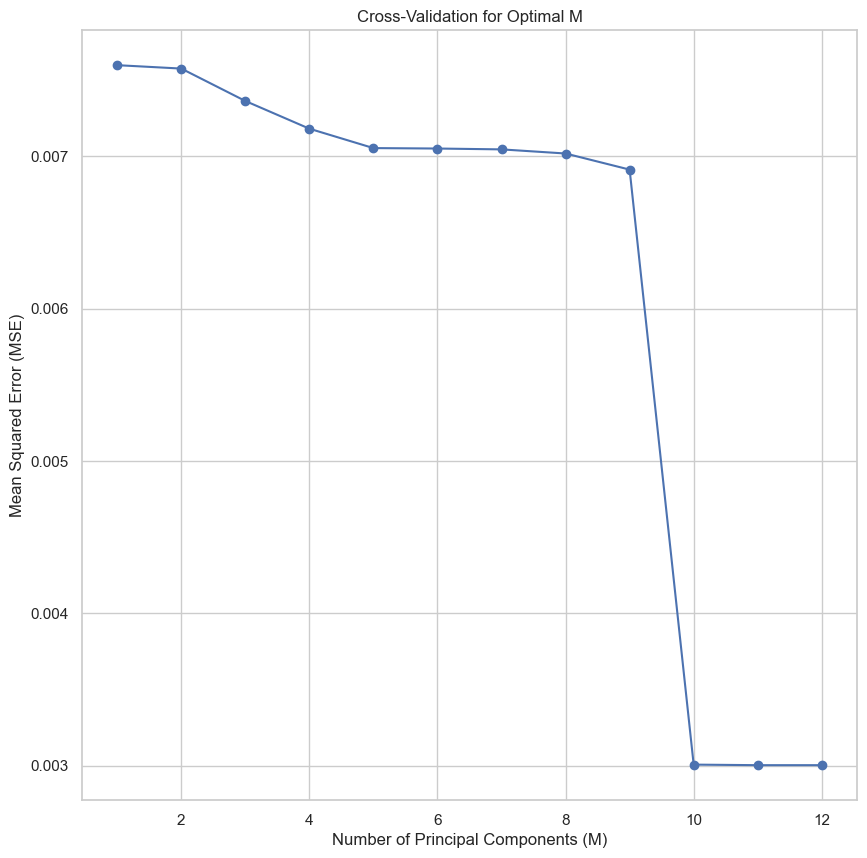

In [81]:
#pcr

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Initialize lists to store the number of principal components (M) and corresponding MSE values
num_components = np.arange(1, len(X.columns) + 1)
mse_values = []

# Perform cross-validation for different values of M
for M in num_components:
    
    # Apply PCA to the training set with the current M
    pca = PCA(n_components=M)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Fit the PCR model on the training set with the current M
    pcr_model = LinearRegression()
    pcr_model.fit(X_train_pca, y_train)

    # Transform the test set with the same PCA
    X_test_pca = pca.transform(X_test_scaled)

    # Predict the number of applications using the PCR model on the test set
    y_pred = pcr_model.predict(X_test_pca)

    # Calculate the test error (mean squared error)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot graph of M vs. MSE
plt.plot(num_components, mse_values, marker='o')
plt.xlabel('Number of Principal Components (M)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation for Optimal M')

# Show the plot
plt.show()

In [82]:
optimal_M=10 #From the above result
# Fit the PCR model with the optimal M on the training set
pca = PCA(n_components=optimal_M)
X_train_pca = pca.fit_transform(X_train_scaled)
pcr_model = LinearRegression()
pcr_model.fit(X_train_pca, y_train)

# Transform the test set with the same PCA
X_test_pca = pca.transform(X_test_scaled)

# Predict the number of applications using the PCR model on the test set
y_pred = pcr_model.predict(X_test_pca)

# Calculate the test error (mean squared error)
test_error = mean_squared_error(y_test, y_pred)
pcr_error = np.sqrt(test_error)

print("Optimal number of principal components (M) selected by cross-validation:", optimal_M)
print("Test error (RMSE) for PCR with Optimal M :", pcr_error)

Optimal number of principal components (M) selected by cross-validation: 10
Test error (RMSE) for PCR with Optimal M : 0.0548323573444072



Features included in Lasso regression:
Index(['Mental Fatigue Score'], dtype='object')

Lasso Regression:
RMSE: 0.1182801216462798
MSE: 0.013990187176658746
R-squared: 0.6384057098829491


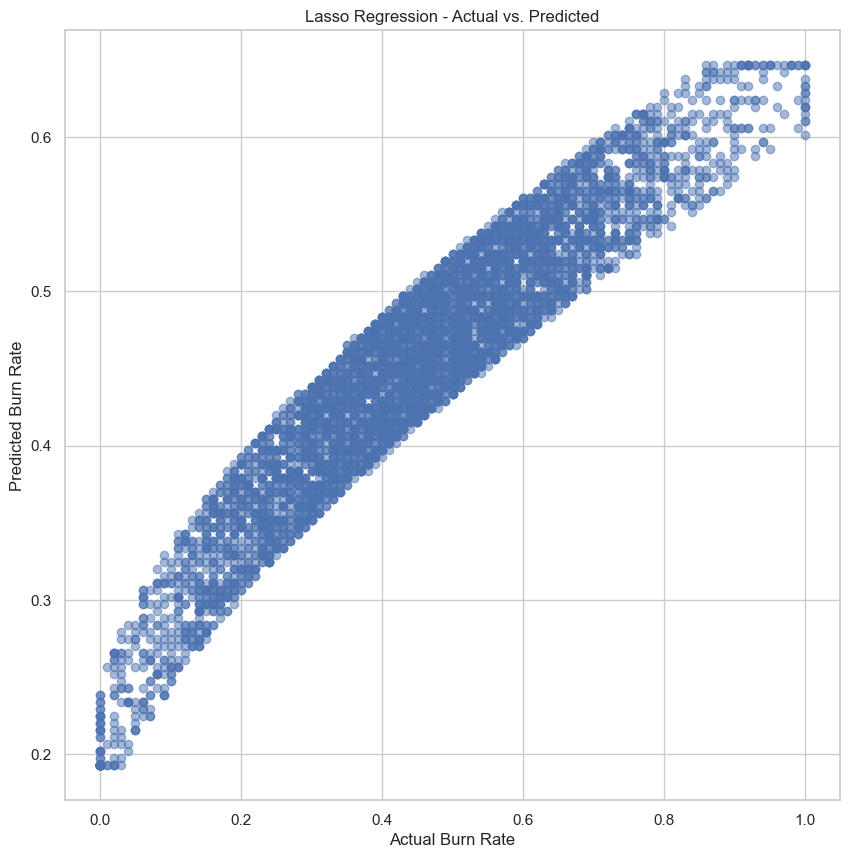

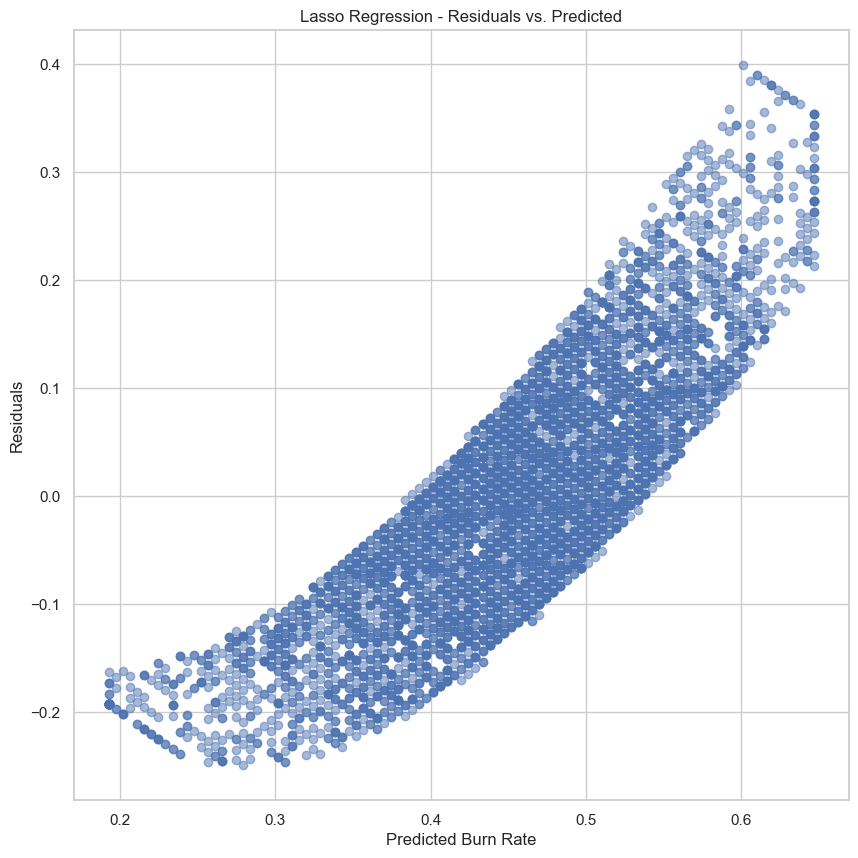

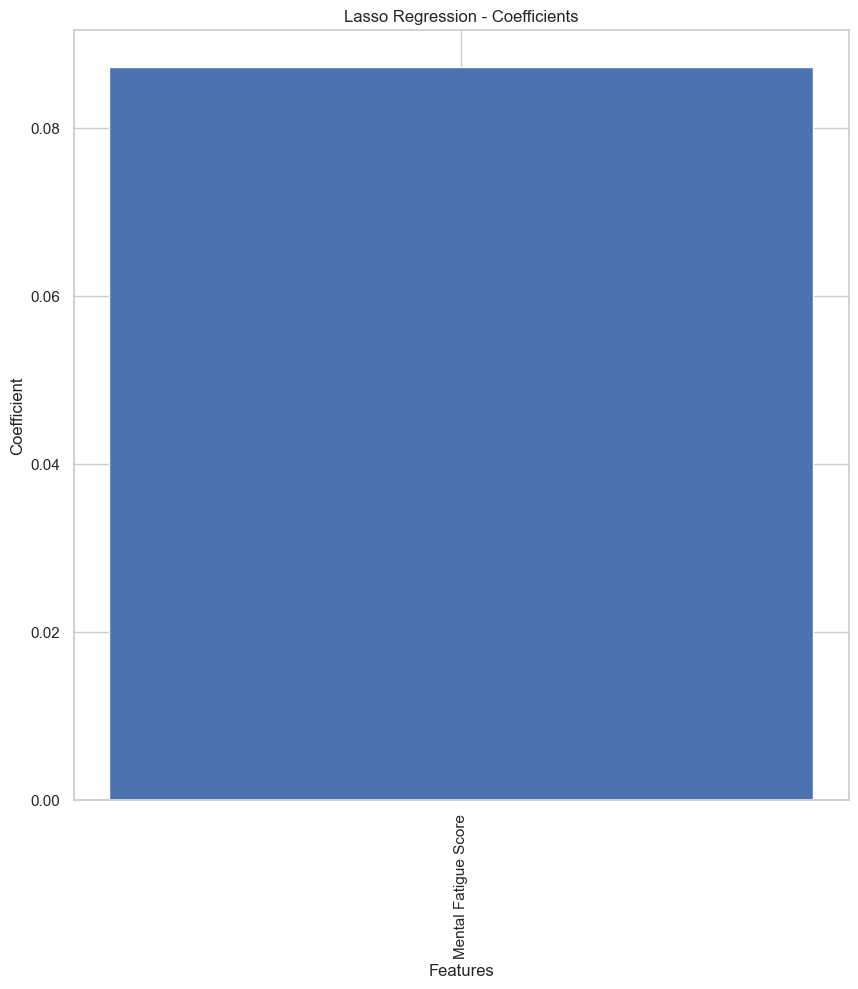

In [83]:
#lasso

from sklearn.linear_model import LinearRegression, Lasso, Ridge


# Fit Lasso regression model using sklearn
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha (regularization strength) here
lasso_model.fit(X_train_scaled, y_train)


# Make predictions on the test set for each model
y_pred_lasso = lasso_model.predict(X_test_scaled)


rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

selected_features_lasso = X.columns[lasso_model.coef_ != 0]

# Print the features included in Lasso and Ridge regression
print("\nFeatures included in Lasso regression:")
print(selected_features_lasso)

print("\nLasso Regression:")
print("RMSE:", rmse_lasso)
print("MSE:", mse_lasso)
print("R-squared:", r2_lasso)

# Plot the predicted vs. actual values for the Lasso model
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Lasso Regression - Actual vs. Predicted")
plt.show()

# Plot the residuals for the Lasso model
residuals_lasso = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.xlabel("Predicted Burn Rate")
plt.ylabel("Residuals")
plt.title("Lasso Regression - Residuals vs. Predicted")
plt.show()

# Plot the coefficients of the Lasso model
plt.bar(range(len(selected_features_lasso)), lasso_model.coef_)
plt.xticks(range(len(selected_features_lasso)), selected_features_lasso, rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Lasso Regression - Coefficients")
plt.show()



Best alpha for Ridge regression: 1

Features included in Ridge regression:
Index(['Gender', 'Company Type', 'WFH Setup Available', 'Resource Allocation',
       'Mental Fatigue Score', 'designation_0.0', 'designation_1.0',
       'designation_2.0', 'designation_3.0', 'designation_4.0',
       'designation_5.0', 'days_count'],
      dtype='object')

Ridge Regression:
RMSE: 0.05479908681159798
MSE: 0.0030029399153850517
R-squared: 0.922385175176252


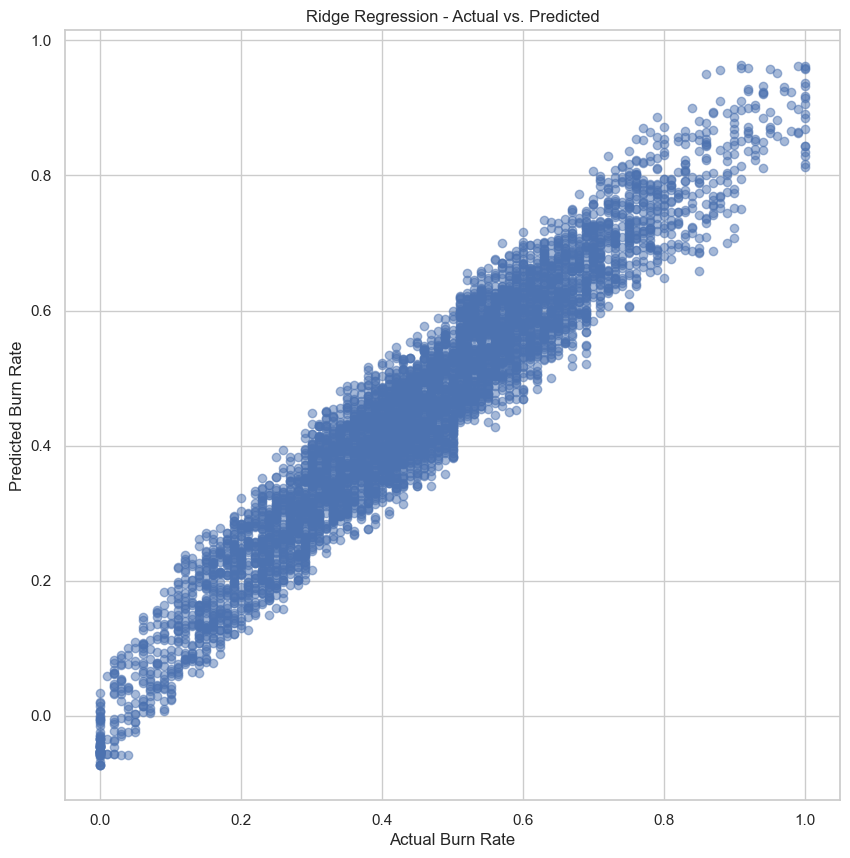

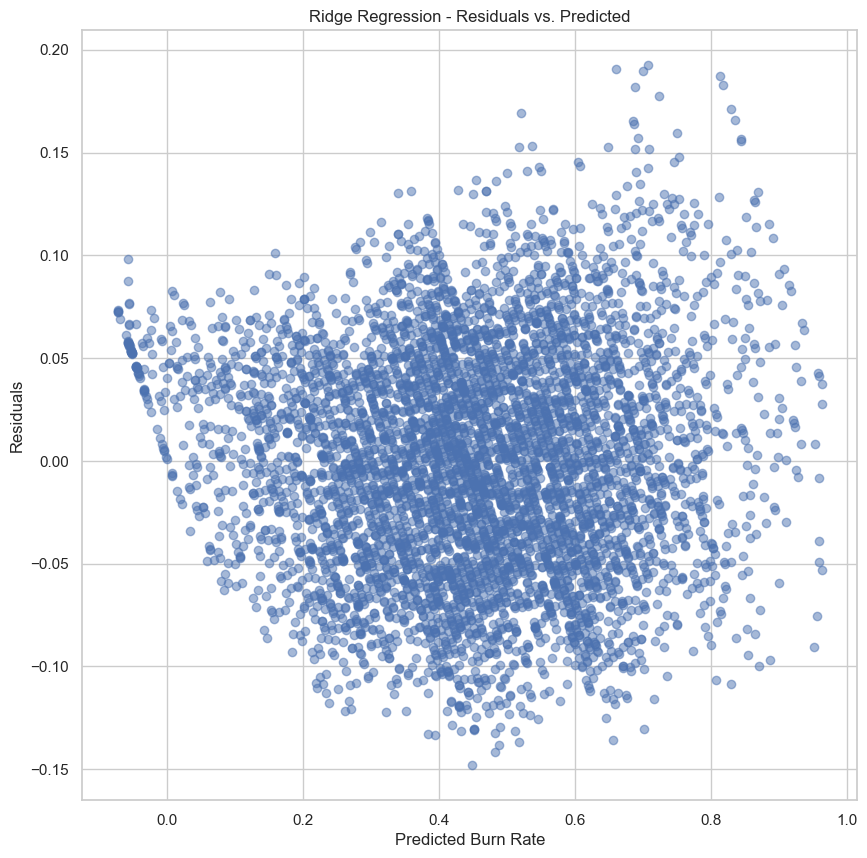

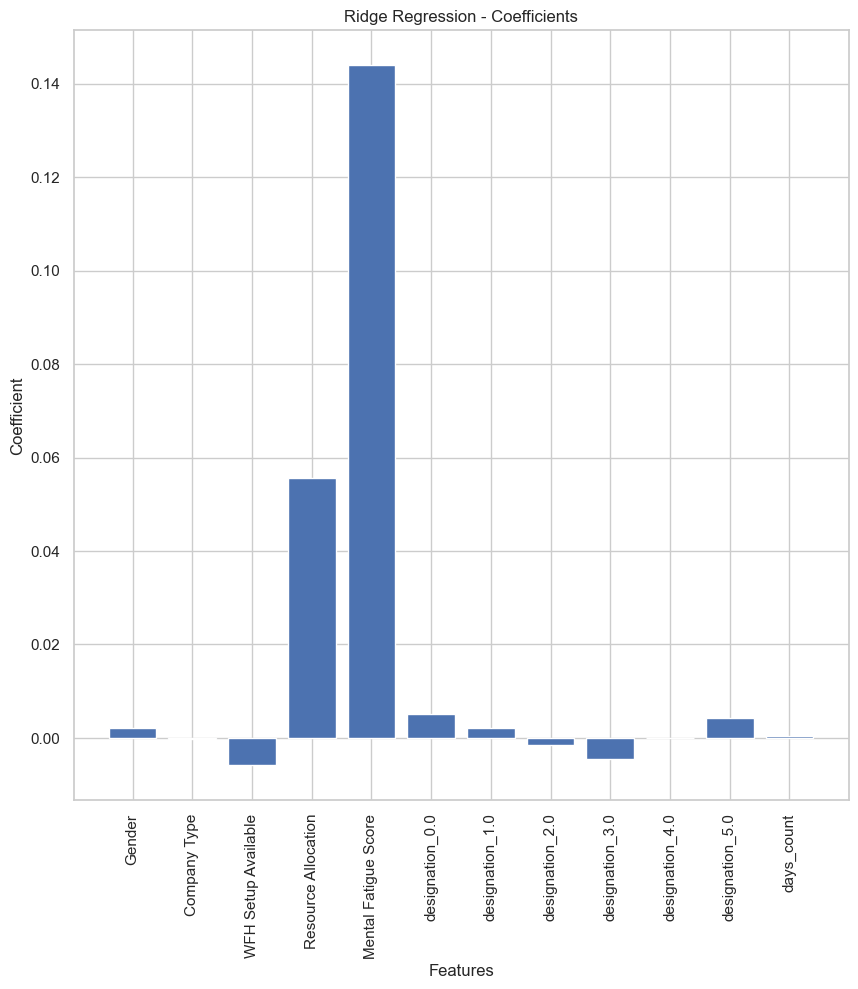

In [84]:
#ridge

# Fit Ridge regression model using sklearn
ridge = Ridge()
ridge_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Add more values as needed
ridge_cv = GridSearchCV(ridge, ridge_grid, cv=5)  # 5-fold cross-validation
ridge_cv.fit(X_train_scaled, y_train)  # Fit Ridge regression with cross-validation

# Get the best alpha from cross-validation
best_alpha_ridge = ridge_cv.best_params_['alpha']
print("\nBest alpha for Ridge regression:", best_alpha_ridge)
ridge_model = Ridge(alpha=best_alpha_ridge)  
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for each model
y_pred_ridge = ridge_model.predict(X_test_scaled)

rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

selected_features_ridge = X.columns[ridge_model.coef_ != 0]


print("\nFeatures included in Ridge regression:")
print(selected_features_ridge)

print("\nRidge Regression:")
print("RMSE:", rmse_ridge)
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)

# Plot the predicted vs. actual values for the best Ridge model
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Ridge Regression - Actual vs. Predicted")
plt.show()

# Plot the residuals for the best Ridge model
residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.xlabel("Predicted Burn Rate")
plt.ylabel("Residuals")
plt.title("Ridge Regression - Residuals vs. Predicted")
plt.show()

# Plot the coefficients of the best Ridge model
plt.bar(range(len(selected_features_ridge)), ridge_model.coef_)
plt.xticks(range(len(selected_features_ridge)), selected_features_ridge, rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Ridge Regression - Coefficients")
plt.show()

### KNN

    CV RMSE
K          
1    0.0897
2    0.0762
3    0.0716
4    0.0693
5    0.0685
6    0.0679
7    0.0680
8    0.0680
9    0.0679
10   0.0682
11   0.0684
12   0.0687
13   0.0690
14   0.0693
15   0.0696


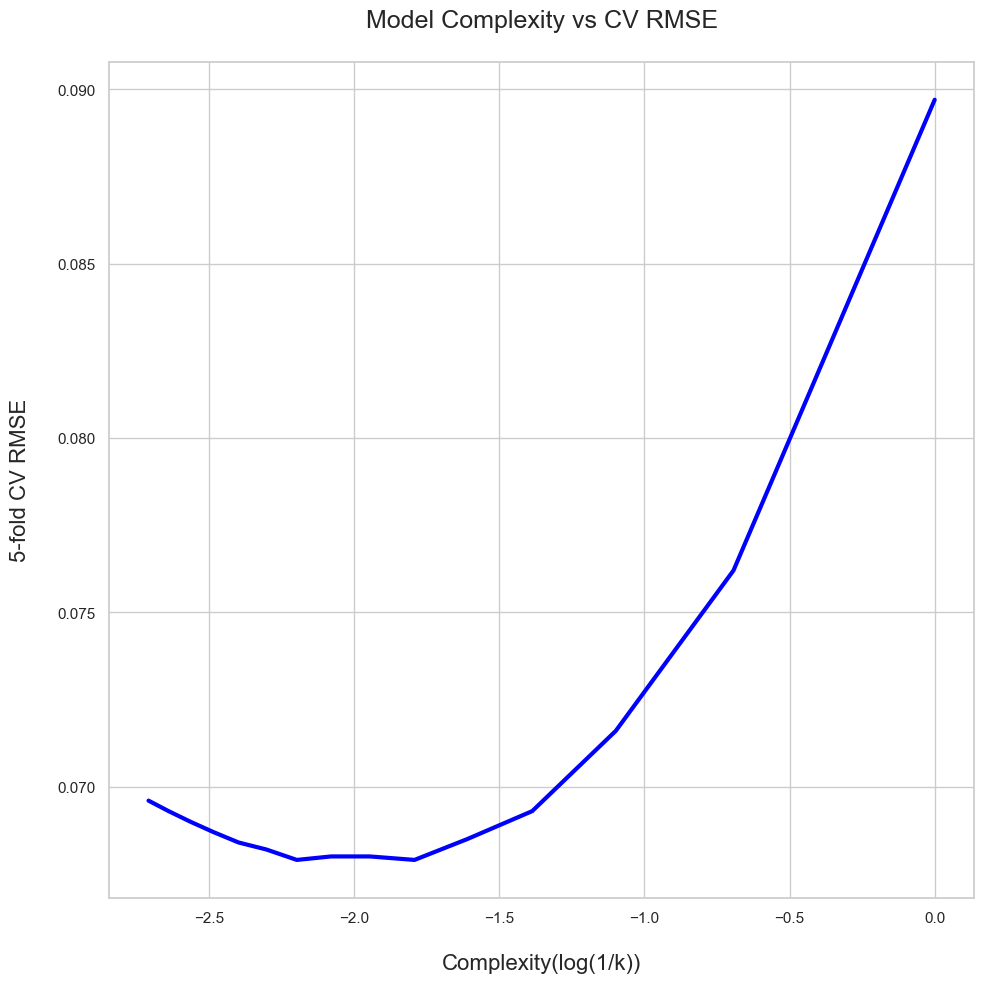

For K =  9  :  
 Training RMSE : 0.063 
 Test RMSE : 0.067
Error % :  14.8 %
Prediction Accuracy % :  85.2 %


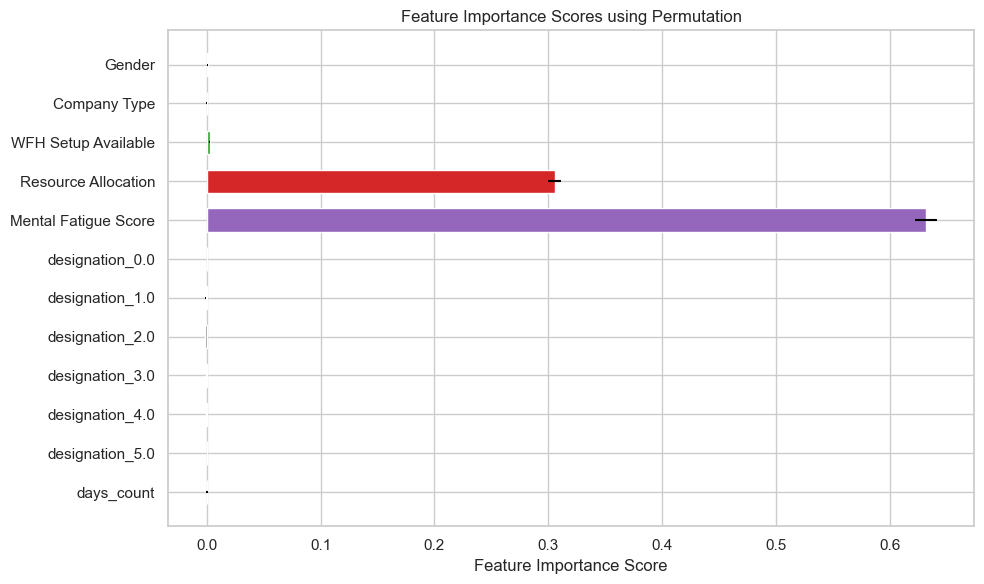

In [86]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
rmse_knn_train =[]
cv_knn=[]
for i in range(1,16):
    model = neighbors.KNeighborsRegressor(n_neighbors= i,
                                       weights='uniform')
    cv_error=cross_val_score(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
    cv_knn.append(round(np.sqrt(-np.mean(cv_error)),4))
index_values=range(1,16)    
cv_results={"CV RMSE": cv_knn, "K": index_values}
cvresults_df=pd.DataFrame(cv_results)
print(cvresults_df.set_index("K"))

min_cvrmse=cvresults_df["CV RMSE"].min() #extracting the minimum cross validation rmse
optimal_k_val=(cvresults_df["K"][cvresults_df["CV RMSE"]==min_cvrmse]).max() #finding the maximum k-value corresponding to min rmse to manage bias-variance tradeoff
    
#fitting the chosen k=8 again on the entire training set and calculating training error
sel_model=neighbors.KNeighborsRegressor(n_neighbors=optimal_k_val,weights="uniform")
model.fit(X_train,y_train)
prediction_on_training=model.predict(X_train)
rmse_knn_train=round(np.sqrt(mean_squared_error(y_train, prediction_on_training)),3)
    
#calculating test error
prediction_on_testing=model.predict(X_test)
rmse_knn=round(np.sqrt(mean_squared_error(y_test, prediction_on_testing)),3)

log_scale=np.log(1/np.array(range(1,16)))

#plt.plot(log_scale,rmse_knn_train,label='Train_RMSE')
plt.plot(log_scale,cv_knn,color="blue",linewidth=3)
plt.title("Model Complexity vs CV RMSE",fontsize=18,pad=25)
plt.xlabel("Complexity(log(1/k))",fontsize=16,labelpad=20)
plt.ylabel("5-fold CV RMSE",fontsize=16,labelpad=20)
plt.tight_layout()
plt.show()

print("For K = ", optimal_k_val, " : " , "\n","Training RMSE :", rmse_knn_train, "\n", "Test RMSE :" ,rmse_knn)
error_percent=round((rmse_knn/train["Burn Rate"].mean())*100,1)
print("Error % : ",error_percent,"%") 
pred_acc=100-error_percent
print("Prediction Accuracy % : ",pred_acc,"%")

# Calculate feature importance using permutation
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names (assuming you have a list of feature names)
feature_names = ['Gender', 'Company Type', 'WFH Setup Available',
       'Resource Allocation', 'Mental Fatigue Score', 'designation_0.0',
       'designation_1.0', 'designation_2.0', 'designation_3.0',
       'designation_4.0', 'designation_5.0', 'days_count']

# Set custom colors for the horizontal bar plot
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#393b79']

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(feature_names))
ax.barh(y_pos, result.importances_mean, xerr=result.importances_std, align='center', height=0.6, color=custom_colors, ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # Invert the y-axis to show the most important feature at the top
ax.set_xlabel('Feature Importance Score')
ax.set_title('Feature Importance Scores using Permutation')

plt.tight_layout()
plt.show()

### Decision Tree

MSE: 0.002997151429552378
Best parameters found: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}


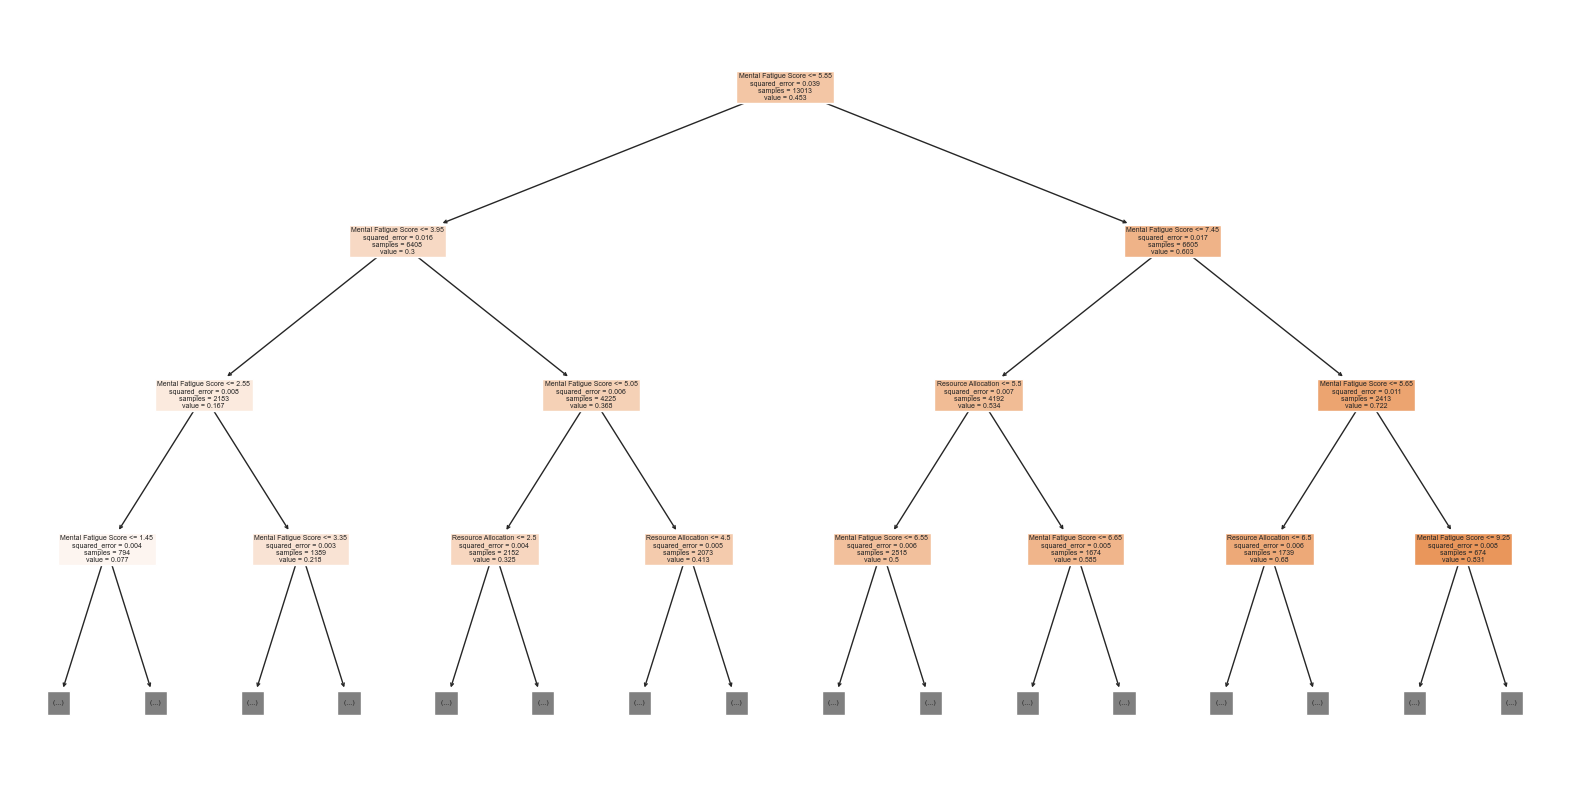

Feature importances ranked:
                 Feature  Importance
4   Mental Fatigue Score    0.954509
3    Resource Allocation    0.037997
11            days_count    0.001717
2    WFH Setup Available    0.001456
7        designation_2.0    0.001101
8        designation_3.0    0.001008
9        designation_4.0    0.000857
6        designation_1.0    0.000540
5        designation_0.0    0.000273
0                 Gender    0.000254
1           Company Type    0.000163
10       designation_5.0    0.000124


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

#Parameters grid
param_grid_tree = {
    'max_depth': [5, 8, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

#Create Decision Tree
tree = DecisionTreeRegressor(random_state=42)

#Create the GridSearchCV object
grid_search_tree = GridSearchCV(estimator=tree,
                                param_grid=param_grid_tree, 
                                cv=5,
                                n_jobs=-1,
                                verbose=0,
                                scoring='neg_mean_squared_error')

#Fit the model to training data
grid_search_tree.fit(X_train, y_train)

#Access the best model
best_tree_model = grid_search_tree.best_estimator_

#Make predictions using the best model
tree_y_pred = best_tree_model.predict(X_test)

#Evaluate the best model
tree_mse = mean_squared_error(y_test, tree_y_pred)
print('MSE:', tree_mse)

#Get the best parameters obtained by the GridSearchCV
best_tree_parameters = grid_search_tree.best_params_
print('Best parameters found:', best_tree_parameters)

#Plot the tree
plt.figure(figsize=(20,10))
plot_tree(best_tree_model, feature_names=list(X_train.columns), filled=True, max_depth=3)
plt.show()

#Get feature importances
tree_feature_importances = best_tree_model.feature_importances_

#Create a DataFrame to hold the feature importances and their corresponding feature names
tree_features_df = pd.DataFrame({
    'Feature': list(X_train.columns), 
    'Importance': tree_feature_importances})

#Sort the features based on importance
tree_features_df = tree_features_df.sort_values(by='Importance',
                                                ascending=False)

#Print the sorted feature importances
print("Feature importances ranked:")
print(tree_features_df)

### Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Parameters grid
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100],
    'max_features': [12, 'sqrt'],
    'max_depth': [5, 8, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

#Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

#Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=0,
                           scoring='neg_mean_squared_error')

#Fit the model to training data
grid_search.fit(X_train, y_train)

#Get the best parameters obtained by the GridSearchCV
best_parameters = grid_search.best_params_
print('Best parameters found:', best_parameters)

#Access the best model
best_model = grid_search.best_estimator_

#Make predictions using the best model
rf_y_pred = best_model.predict(X_test)

#Evaluate the best model
rf_mse = mean_squared_error(y_test, rf_y_pred)
print('MSE:', rf_mse)

Best parameters found: {'max_depth': 8, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.0028176661004298887


In [92]:
#Best Random Forest
best_rf = RandomForestRegressor(n_estimators=100,
                                max_depth=10,
                                max_features=12,
                                min_samples_leaf=2,
                                min_samples_split=10,
                                random_state=42)
best_rf.fit(X_train, y_train)

best_rf_y_pred = best_rf.predict(X_test)
best_rf_test_mse = mean_squared_error(y_test, best_rf_y_pred)

print('Test MSE with Random Forest:', best_rf_test_mse)

#Get feature importances
feature_importances = best_rf.feature_importances_

#Create a DataFrame to hold the feature importances and their corresponding feature names
features_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances})

#Sort the features based on importance
features_df = features_df.sort_values(by='Importance',
                                      ascending=False)

#Print the sorted feature importances
print("Feature importances ranked:")
print(features_df)

Test MSE with Random Forest: 0.0028580598845392535
Feature importances ranked:
                 Feature  Importance
4   Mental Fatigue Score    0.946912
3    Resource Allocation    0.034057
11            days_count    0.009989
2    WFH Setup Available    0.002412
8        designation_3.0    0.001190
7        designation_2.0    0.001147
0                 Gender    0.001144
1           Company Type    0.000899
9        designation_4.0    0.000886
6        designation_1.0    0.000688
10       designation_5.0    0.000427
5        designation_0.0    0.000250


#### Using Random Forest to find burn rate for a few parameters

In [93]:
# Predict the response variable using the fixed predictor values
fixed_predictor_values = X_test.iloc[0:1]  # Select the first row and keep it as a DataFrame
predicted_response = best_rf.predict(fixed_predictor_values)

print("Predicted Response Variable:", predicted_response)
print("Fixed Predictor Values:")
print(fixed_predictor_values)

Predicted Response Variable: [0.26175057]
Fixed Predictor Values:
      Gender  Company Type  WFH Setup Available  Resource Allocation  \
8815       1             0                    1                  2.0   

      Mental Fatigue Score  designation_0.0  designation_1.0  designation_2.0  \
8815                   3.9                0                1                0   

      designation_3.0  designation_4.0  designation_5.0  days_count  
8815                0                0                0         203  


In [94]:
# Predict the response variable using the fixed predictor values
fixed_predictor_values = X_test.iloc[10:11]  # Select the first row and keep it as a DataFrame
predicted_response = best_rf.predict(fixed_predictor_values)

print("Predicted Response Variable:", predicted_response)
print("Fixed Predictor Values:")
print(fixed_predictor_values)

Predicted Response Variable: [0.39210769]
Fixed Predictor Values:
       Gender  Company Type  WFH Setup Available  Resource Allocation  \
13982       0             0                    1                  5.0   

       Mental Fatigue Score  designation_0.0  designation_1.0  \
13982                   5.2                0                0   

       designation_2.0  designation_3.0  designation_4.0  designation_5.0  \
13982                0                1                0                0   

       days_count  
13982           3  


In [95]:
# Predict the response variable using the fixed predictor values
fixed_predictor_values = X_test.iloc[14:15]  # Select the first row and keep it as a DataFrame
predicted_response = best_rf.predict(fixed_predictor_values)

print("Predicted Response Variable:", predicted_response)
print("Fixed Predictor Values:")
print(fixed_predictor_values)

Predicted Response Variable: [0.63274289]
Fixed Predictor Values:
       Gender  Company Type  WFH Setup Available  Resource Allocation  \
11058       1             0                    1                  7.0   

       Mental Fatigue Score  designation_0.0  designation_1.0  \
11058                   7.2                0                0   

       designation_2.0  designation_3.0  designation_4.0  designation_5.0  \
11058                0                0                1                0   

       days_count  
11058          40  


In [100]:
# Predict the response variable using the fixed predictor values
fixed_predictor_values = X_test.iloc[15:16]  # Select the first row and keep it as a DataFrame;778
predicted_response = best_rf.predict(fixed_predictor_values)

print("Predicted Response Variable:", predicted_response)
print("Fixed Predictor Values:")
print(fixed_predictor_values)

Predicted Response Variable: [0.74019816]
Fixed Predictor Values:
       Gender  Company Type  WFH Setup Available  Resource Allocation  \
17025       0             0                    1                  7.0   

       Mental Fatigue Score  designation_0.0  designation_1.0  \
17025                   8.6                0                0   

       designation_2.0  designation_3.0  designation_4.0  designation_5.0  \
17025                1                0                0                0   

       days_count  
17025         222  
